## Final Project Submission

* Student name: Peter Burton, Jillian Clark, Mychal Dubyk
* Student pace: Full Time
* Scheduled project review date/time: 6/24/22
* Instructor name: William and Daniel

## Overview

We are a data science consulting company named The ABCD Team looking to provide predictive and actionable insights regarding sale pricing for realtors using the power of big data. We hope to create a complex model using several different independent variables that can swifty and effectively achieve pricing estimates closer to realized housing prices than both the comparables method often used by realtors as well as our simple linear regression model.

## Business Problem

During a typical Real Estate listing process, a Real Estate Agent is required to search through nearby recent sales to find “comparables.”
“Comparables” are recently sold listings that that closely mirror key features such as square footage, key  amenities, etc, and select several similar properties to compare the new listing property to, and to help assign a reasonable listing price. 
Although selecting comparables can help create somewhat reasonable predictions, it can also have drawbacks, inconsistencies, and be a time consuming process for a Realtor.


### Issues With Using Comparables

Multiple studies and articles* on the use of comparables(comps) highlight some common issues:
- Locations are too far away to provide accurate recommendations, or are part of a different zip code or school zone even if they are geographically close
- Volatility of the real estate market makes it common for comps to be too “stale” or too far in the past to be reliable
- Sometimes rely on houses that are still on the market, and the waters are muddied by the variation in list prices vs sale prices
- Drawn from appraisal data and not sales data
- A focus on tracking past data, not future predictions and trends
- Fail to predict prices accurately near the ultra high end of the market


### Solution!

A data driven machine learning tool, that can sift through large amounts of housing data, and find trends, identify key features, and accurately and reliably predict the best listing price for a new listing in the King County housing market.

## Data Understanding

We are sourcing the data for this project from the King County House Sales dataset, which can be found at kc_house_data.csv in the data folder in the GitHub repository. The column name descriptions can also be found in this data folder, under the name column_names.md and are listed below. Our visualizations can also be found seperately in the visualization_images folder located in this repository. We will analyze a list of variables from the Kings County housing data such as price, square foot of living space, condition of living space, whether or not the property is waterfront, distance from Seattle Art Musueum using latitude and longitudes, and the number of bedrooms and bathrooms.

The following is the list of column names and descriptions:


### Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

## Rationale

We are utilizing statistical analysis because we would like to identify trends and isolate how much each variable impacts housing price. We applied changes between our model iterations to achieve the highest r-squared value while still meeting the assumptions of linear regression. Given that we are working with multiple variables and inputs to draw conclusions and make predictions on the data, we believe that statistical analysis is the perfect fit to solve this business problem.

## Data Preparation

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
from statsmodels.formula.api import ols
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

%matplotlib inline

Pulling in data and exploring data prior to cleaning.

In [2]:
data = pd.read_csv('./data/kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We see we have null values in "waterfront", "view", and "yr_renovated" columns. 

In [6]:
data['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [7]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


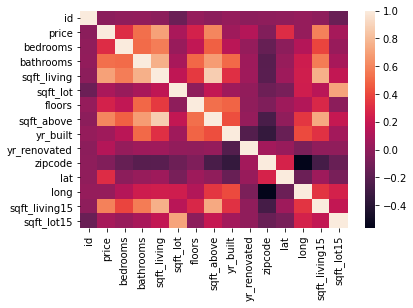

In [8]:
sns.heatmap(data.corr());

We see yr_renovated and price have correlation .1296; we figure the addition in price might flatten past a certain year.  

In [9]:
data.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

We see we have both nulls and "0" values in this column.

In [10]:
data.yr_renovated.describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [11]:
17755 - 17011

744

'yr_renovated' only contains 744 values, which is less than 1% of the data. Dropping the column 'yr_renovated' due to the low value counts.

In [12]:
data.drop(columns='yr_renovated', inplace=True)

In [13]:
data.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

We see view contains 60 null values. We could drop those rows utilizing dropna or replace with our Mode value, "None." We chose to replace with our Mode, due to having an overwhelming Mode.

In [14]:
data['view'].fillna("NONE", inplace=True)

In [15]:
data['view'].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [16]:
data['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

For our waterfront data, we could replace nulls with mode or create 3rd column "Unknown". We will create a 3rd column as to not lose that data.

In [17]:
data['waterfront'].fillna("UNKNOWN", inplace=True)

In [18]:
data['waterfront'].value_counts()

NO         19075
UNKNOWN     2376
YES          146
Name: waterfront, dtype: int64

In [19]:
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
1913.0        1
176.0         1
274.0         1
2120.0        1
Name: sqft_basement, Length: 304, dtype: int64

Here we see we have some values of "?"; we need to decide how to clean this data. We will replace "?" with 0 because a large proportion of our data is at 0.

In [20]:
data['sqft_basement'].replace(to_replace = '?', value = 0.0, inplace=True)

In [21]:
data['sqft_basement'].value_counts()

0.0       12826
0.0         454
600.0       217
500.0       209
700.0       208
          ...  
792.0         1
915.0         1
417.0         1
3260.0        1
666.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [22]:
data['sqft_basement'] = data['sqft_basement'].astype(str).astype(float)

In [23]:
data['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

Since there is only 1 data point with a grade of (3 Poor), we will drop it as in contains <1% of the data.

In [24]:
data = data[data.grade != '3 Poor']

In [25]:
data['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
Name: grade, dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   date           21596 non-null  object 
 2   price          21596 non-null  float64
 3   bedrooms       21596 non-null  int64  
 4   bathrooms      21596 non-null  float64
 5   sqft_living    21596 non-null  int64  
 6   sqft_lot       21596 non-null  int64  
 7   floors         21596 non-null  float64
 8   waterfront     21596 non-null  object 
 9   view           21596 non-null  object 
 10  condition      21596 non-null  object 
 11  grade          21596 non-null  object 
 12  sqft_above     21596 non-null  int64  
 13  sqft_basement  21596 non-null  float64
 14  yr_built       21596 non-null  int64  
 15  zipcode        21596 non-null  int64  
 16  lat            21596 non-null  float64
 17  long           21596 non-null  float64
 18  sqft_l

In [27]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016799,0.001061,0.005100,-0.012301,-0.131914,0.018577,-0.010853,-0.004382,0.021559,-0.008247,-0.001887,0.020727,-0.002733,-0.138560
price,-0.016799,1.000000,0.308749,0.525889,0.701914,0.089876,0.256780,0.605355,0.321092,0.053897,-0.053441,0.306653,0.022092,0.585228,0.082845
bedrooms,0.001061,0.308749,1.000000,0.514413,0.578137,0.032470,0.177866,0.479303,0.297200,0.155498,-0.154244,-0.010256,0.132266,0.393362,0.030692
bathrooms,0.005100,0.525889,0.514413,1.000000,0.755724,0.088375,0.502553,0.686629,0.278454,0.507103,-0.204893,0.024076,0.225060,0.569860,0.088307
sqft_living,-0.012301,0.701914,0.578137,0.755724,1.000000,0.173460,0.353912,0.876433,0.428642,0.318059,-0.199902,0.051967,0.241366,0.756393,0.184353
sqft_lot,-0.131914,0.089876,0.032470,0.088375,0.173460,1.000000,-0.004817,0.184146,0.015030,0.052946,-0.129591,-0.085533,0.230243,0.144763,0.718204
floors,0.018577,0.256780,0.177866,0.502553,0.353912,-0.004817,1.000000,0.523962,-0.241901,0.489163,-0.059588,0.049139,0.126019,0.280073,-0.010723
sqft_above,-0.010853,0.605355,0.479303,0.686629,0.876433,0.184146,0.523962,1.000000,-0.051224,0.423966,-0.261665,-0.001380,0.344990,0.731755,0.195086
sqft_basement,-0.004382,0.321092,0.297200,0.278454,0.428642,0.015030,-0.241901,-0.051224,1.000000,-0.130148,0.073242,0.109794,-0.142332,0.199265,0.015885
yr_built,0.021559,0.053897,0.155498,0.507103,0.318059,0.052946,0.489163,0.423966,-0.130148,1.000000,-0.347327,-0.148607,0.410169,0.326331,0.070781


Here we are dropping ID and Date columns as they are not relevant to our analysis. ID is a unique identifier to a home and does not carry any data relevant to the sale of the home. We will not include date the house was sold since we would not have this information prior to pricing a home. 

In [28]:
data.drop(columns=('id'), inplace=True)

In [29]:
data.drop(columns=('date'), inplace=True)

We are adding a price per sqft columnn to help with comparison and initial evaluation.

In [30]:
data['price_per_sqft_living'] = (data['price']/data['sqft_living'])

In [31]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living
0,221900.0,3,1.00,1180,5650,1.0,UNKNOWN,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,188.050847
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,209.338521
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,233.766234
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,308.163265
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,303.571429


We want to further look into how distance from the epicenter of Seattle effects sale price. We will create a column calculating difference between home and Seattle epicenter. We will be utilizing the Seattle Art Museum coordinates for Seattle: (lat = 47.6077, long= -122.337). We will be calculating this distance in miles.

In [32]:
from geopy.distance import geodesic
import geopy

In [33]:
coords = (47.6077, -122.337)

In [34]:
data['distance_from_Seattle'] = data.apply(lambda x: geopy.distance.distance((x.lat, x. long), coords).miles, axis=1)

In [35]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,distance_from_Seattle
0,221900.0,3,1.00,1180,5650,1.0,UNKNOWN,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,188.050847,7.644653
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,209.338521,7.872439
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,233.766234,10.220653
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,308.163265,6.549707
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,303.571429,13.655673


We have cleaned all of our null values and added new columns we have found relevant. We will drop lat, long, and zipcode since we have captured data related to location with our new column, 'distance_from_Seattle'.

In [36]:
data.drop(columns=['zipcode', 'lat', 'long'], inplace=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  21596 non-null  float64
 1   bedrooms               21596 non-null  int64  
 2   bathrooms              21596 non-null  float64
 3   sqft_living            21596 non-null  int64  
 4   sqft_lot               21596 non-null  int64  
 5   floors                 21596 non-null  float64
 6   waterfront             21596 non-null  object 
 7   view                   21596 non-null  object 
 8   condition              21596 non-null  object 
 9   grade                  21596 non-null  object 
 10  sqft_above             21596 non-null  int64  
 11  sqft_basement          21596 non-null  float64
 12  yr_built               21596 non-null  int64  
 13  sqft_living15          21596 non-null  int64  
 14  sqft_lot15             21596 non-null  int64  
 15  pr

Here, we create visualizations to see if the data is relatively normal and if we want to utilize the data. If we decide to utilize these variables and hot code, we need to drop a column to prevent multicollinearity. The column dropped will become the baseline. We will encode once we train the data.

In [38]:
data['condition'] = pd.Categorical(data['condition'], ['Poor','Fair','Average','Good', 'Very Good'])

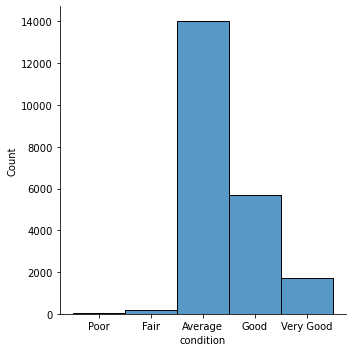

In [39]:
sns.displot(data=data, x='condition');

In [40]:
data['grade'] = pd.Categorical(data['grade'], ['4 Low','5 Fair','6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'])

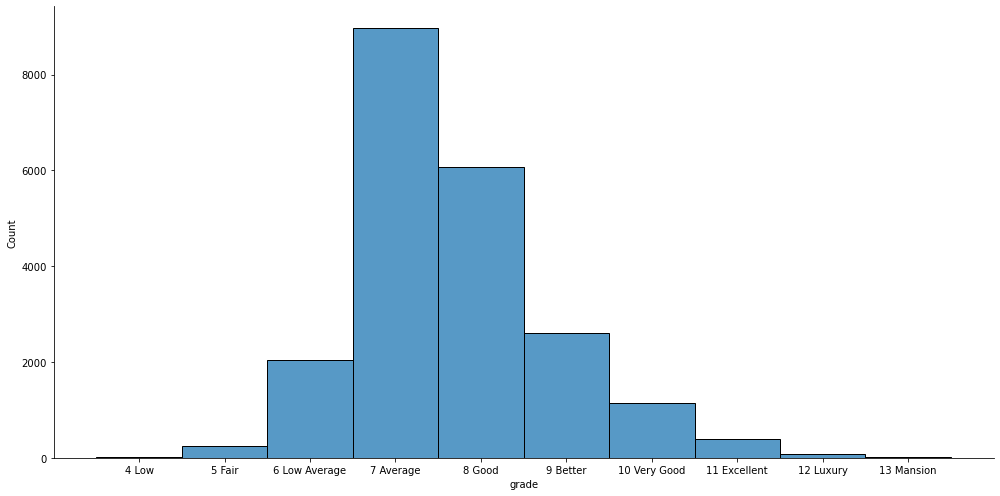

In [41]:
sns.displot(data=data, x='grade', height=7, aspect=2);

In [42]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price_per_sqft_living,distance_from_Seattle
price,1.000000,0.308749,0.525889,0.701914,0.089876,0.256780,0.605355,0.321092,0.053897,0.585228,0.082845,0.556201,-0.283653
bedrooms,0.308749,1.000000,0.514413,0.578137,0.032470,0.177866,0.479303,0.297200,0.155498,0.393362,0.030692,-0.205700,0.060773
bathrooms,0.525889,0.514413,1.000000,0.755724,0.088375,0.502553,0.686629,0.278454,0.507103,0.569860,0.088307,-0.090123,0.086247
sqft_living,0.701914,0.578137,0.755724,1.000000,0.173460,0.353912,0.876433,0.428642,0.318059,0.756393,0.184353,-0.091011,0.078417
sqft_lot,0.089876,0.032470,0.088375,0.173460,1.000000,-0.004817,0.184146,0.015030,0.052946,0.144763,0.718204,-0.034748,0.243477
floors,0.256780,0.177866,0.502553,0.353912,-0.004817,1.000000,0.523962,-0.241901,0.489163,0.280073,-0.010723,0.004744,0.004315
sqft_above,0.605355,0.479303,0.686629,0.876433,0.184146,0.523962,1.000000,-0.051224,0.423966,0.731755,0.195086,-0.087415,0.194830
sqft_basement,0.321092,0.297200,0.278454,0.428642,0.015030,-0.241901,-0.051224,1.000000,-0.130148,0.199265,0.015885,-0.023515,-0.199030
yr_built,0.053897,0.155498,0.507103,0.318059,0.052946,0.489163,0.423966,-0.130148,1.000000,0.326331,0.070781,-0.289918,0.391813
sqft_living15,0.585228,0.393362,0.569860,0.756393,0.144763,0.280073,0.731755,0.199265,0.326331,1.000000,0.183518,0.039099,0.139260


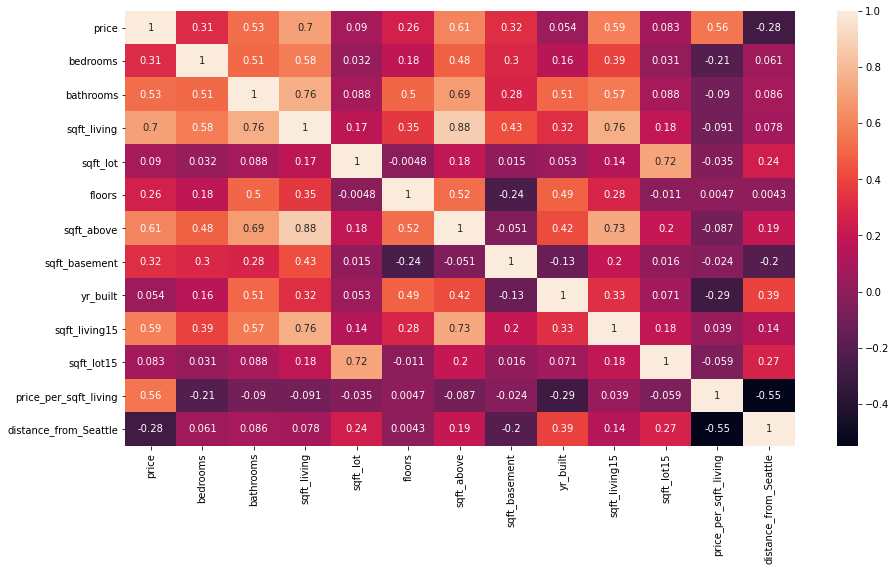

In [43]:
cor = data.corr()

plt.figure(figsize = (15, 8))
sns.heatmap(cor, annot=True);

We see that there is a large difference in the correlations between codition and price and grade and price, even though the columns seem to describe similar attributes. We see 'sqft_living' highly correlated to 'bathrooms', 'grade', 'sqft_above', and 'sqft_living15'. We also see 'sqft_lot' is highly correlated to 'sqft_lot15.

We will drop price_per_sqft_living prior to analysis since we would not have that information prior to setting the price for a home.

In [44]:
data.drop(columns=['price_per_sqft_living'], inplace=True)

## Data Analysis

Here we will do our Train Test split of our data. 

In [45]:
X, y = data.drop(columns='price'), data['price']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [47]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17276, 15) (4320, 15) (17276,) (4320,)


We need to deal with our categorical variables, which we will convert utilizing One Hot Encoding. When modeling, we will have to remove one encoder from each category. 

In [48]:
categoricals = ['view', 'waterfront', 'condition', 'grade']
X_train_dummies = pd.get_dummies(X_train[categoricals], prefix=categoricals)
X_train_dummies

,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,waterfront_NO,waterfront_UNKNOWN,waterfront_YES,condition_Poor,condition_Fair,...,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion
17843,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16911,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
20876,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14355,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
15790,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
21246,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1175,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2934,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
categoricals = ['view', 'waterfront', 'condition', 'grade']
X_test_dummies = pd.get_dummies(X_test[categoricals], prefix=categoricals)
X_test_dummies

,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,waterfront_NO,waterfront_UNKNOWN,waterfront_YES,condition_Poor,condition_Fair,...,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion
3991,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
16939,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9467,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
20168,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10554,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
5671,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10944,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
18174,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Dropping the categorical columns so we can add the dummied columns.

In [50]:
X_train.drop(['view', 'condition', 'grade', 'waterfront'], axis=1, inplace=True)

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [51]:
X_test.drop(['view', 'condition', 'grade', 'waterfront'], axis=1, inplace=True)

We also need to drop one variable from each category. We will drop view_AVERAGE, waterfronT_NO, condition_AVERAGE, and grade_7 AVERAGE.

In [52]:
X_train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17276 entries, 17843 to 6619
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   view_AVERAGE         17276 non-null  uint8
 1   view_EXCELLENT       17276 non-null  uint8
 2   view_FAIR            17276 non-null  uint8
 3   view_GOOD            17276 non-null  uint8
 4   view_NONE            17276 non-null  uint8
 5   waterfront_NO        17276 non-null  uint8
 6   waterfront_UNKNOWN   17276 non-null  uint8
 7   waterfront_YES       17276 non-null  uint8
 8   condition_Poor       17276 non-null  uint8
 9   condition_Fair       17276 non-null  uint8
 10  condition_Average    17276 non-null  uint8
 11  condition_Good       17276 non-null  uint8
 12  condition_Very Good  17276 non-null  uint8
 13  grade_4 Low          17276 non-null  uint8
 14  grade_5 Fair         17276 non-null  uint8
 15  grade_6 Low Average  17276 non-null  uint8
 16  grade_7 Average    

In [53]:
X_train_dummies.drop(['view_AVERAGE', 'condition_Average', 'grade_7 Average', 'waterfront_NO'], axis=1, inplace=True)

In [54]:
X_test_dummies.drop(['view_AVERAGE', 'condition_Average', 'grade_7 Average', 'waterfront_NO'], axis=1, inplace=True)

We now need to join our test/train datasets with our dummied data sets.

In [55]:
X_test = X_test.join(X_test_dummies)

In [56]:
X_train = X_train.join(X_train_dummies)

In [57]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4320 entries, 3991 to 13008
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bedrooms               4320 non-null   int64  
 1   bathrooms              4320 non-null   float64
 2   sqft_living            4320 non-null   int64  
 3   sqft_lot               4320 non-null   int64  
 4   floors                 4320 non-null   float64
 5   sqft_above             4320 non-null   int64  
 6   sqft_basement          4320 non-null   float64
 7   yr_built               4320 non-null   int64  
 8   sqft_living15          4320 non-null   int64  
 9   sqft_lot15             4320 non-null   int64  
 10  distance_from_Seattle  4320 non-null   float64
 11  view_EXCELLENT         4320 non-null   uint8  
 12  view_FAIR              4320 non-null   uint8  
 13  view_GOOD              4320 non-null   uint8  
 14  view_NONE              4320 non-null   uint8  
 15  

In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17276 entries, 17843 to 6619
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bedrooms               17276 non-null  int64  
 1   bathrooms              17276 non-null  float64
 2   sqft_living            17276 non-null  int64  
 3   sqft_lot               17276 non-null  int64  
 4   floors                 17276 non-null  float64
 5   sqft_above             17276 non-null  int64  
 6   sqft_basement          17276 non-null  float64
 7   yr_built               17276 non-null  int64  
 8   sqft_living15          17276 non-null  int64  
 9   sqft_lot15             17276 non-null  int64  
 10  distance_from_Seattle  17276 non-null  float64
 11  view_EXCELLENT         17276 non-null  uint8  
 12  view_FAIR              17276 non-null  uint8  
 13  view_GOOD              17276 non-null  uint8  
 14  view_NONE              17276 non-null  uint8  
 15 

In [59]:
training_data = X_train.join(y_train)

In [60]:
training_data.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,...,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_8 Good,grade_9 Better,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,price
bedrooms,1.000000,0.527799,0.596137,0.034978,0.183881,0.493947,0.307867,0.160679,0.405554,0.033003,...,-0.069898,-0.119792,-0.247899,0.077041,0.166574,0.138391,0.122874,0.062507,0.037896,0.319467
bathrooms,0.527799,1.000000,0.758252,0.089691,0.502104,0.690250,0.277937,0.508499,0.573060,0.091454,...,-0.055323,-0.137695,-0.367772,0.188691,0.266049,0.270647,0.249096,0.170774,0.102700,0.529186
sqft_living,0.596137,0.758252,1.000000,0.173248,0.349527,0.876143,0.431235,0.315131,0.755133,0.188137,...,-0.053739,-0.127652,-0.312441,0.069594,0.315228,0.365674,0.345622,0.250528,0.148885,0.705037
sqft_lot,0.034978,0.089691,0.173248,1.000000,-0.003145,0.179762,0.022921,0.049037,0.137835,0.712525,...,0.000627,0.022935,-0.017295,-0.022991,0.043717,0.074570,0.074839,0.067363,0.007684,0.089471
floors,0.183881,0.502104,0.349527,-0.003145,1.000000,0.521912,-0.245726,0.487306,0.280362,-0.010703,...,-0.029604,-0.080243,-0.229985,0.203985,0.242653,0.176036,0.117874,0.057877,0.022414,0.256185
sqft_above,0.493947,0.690250,0.876143,0.179762,0.521912,1.000000,-0.049013,0.420195,0.732228,0.194050,...,-0.047587,-0.109088,-0.280466,0.059401,0.341157,0.375497,0.342040,0.233194,0.125581,0.608112
sqft_basement,0.307867,0.277937,0.431235,0.022921,-0.245726,-0.049013,1.000000,-0.127536,0.197651,0.025424,...,-0.022266,-0.060002,-0.121658,0.032814,0.016324,0.056153,0.075930,0.085615,0.075084,0.323081
yr_built,0.160679,0.508499,0.315131,0.049037,0.487306,0.420195,-0.127536,1.000000,0.327502,0.066296,...,-0.040688,-0.132021,-0.313780,0.199800,0.220700,0.149212,0.099049,0.049004,0.005670,0.057282
sqft_living15,0.405554,0.573060,0.755133,0.137835,0.280362,0.732228,0.197651,0.327502,1.000000,0.185746,...,-0.031772,-0.096961,-0.284558,0.072990,0.339815,0.359205,0.306217,0.190177,0.075928,0.584559
sqft_lot15,0.033003,0.091454,0.188137,0.712525,-0.010703,0.194050,0.025424,0.066296,0.185746,1.000000,...,0.001339,0.016180,-0.020680,-0.032649,0.055856,0.074995,0.080726,0.069710,0.013610,0.086093


## Scaling Data

In [61]:
ss=StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)

In [62]:
X_test_scaled = ss.transform(X_test)

## Reviewing Correlation Between Variables

In [63]:
corr = training_data.corr()

In [64]:
#remove correlation of features with themselves
corr = corr[corr < 1]

#top positively correlated
corr[corr < 1].unstack().sort_values(ascending=False)[:20]

sqft_above      sqft_living       0.876143
sqft_living     sqft_above        0.876143
bathrooms       sqft_living       0.758252
sqft_living     bathrooms         0.758252
                sqft_living15     0.755133
sqft_living15   sqft_living       0.755133
sqft_above      sqft_living15     0.732228
sqft_living15   sqft_above        0.732228
sqft_lot        sqft_lot15        0.712525
sqft_lot15      sqft_lot          0.712525
sqft_living     price             0.705037
price           sqft_living       0.705037
sqft_above      bathrooms         0.690250
bathrooms       sqft_above        0.690250
sqft_above      price             0.608112
price           sqft_above        0.608112
sqft_living     bedrooms          0.596137
bedrooms        sqft_living       0.596137
view_EXCELLENT  waterfront_YES    0.588945
waterfront_YES  view_EXCELLENT    0.588945
dtype: float64

In [65]:
#top negatively correlated
corr.unstack().sort_values(ascending=True)[:20]

view_GOOD              view_NONE               -0.470855
view_NONE              view_GOOD               -0.470855
                       view_FAIR               -0.374289
view_FAIR              view_NONE               -0.374289
view_EXCELLENT         view_NONE               -0.372785
view_NONE              view_EXCELLENT          -0.372785
bathrooms              grade_6 Low Average     -0.367772
grade_6 Low Average    bathrooms               -0.367772
price                  view_NONE               -0.352862
view_NONE              price                   -0.352862
grade_6 Low Average    yr_built                -0.313780
yr_built               grade_6 Low Average     -0.313780
sqft_living            grade_6 Low Average     -0.312441
grade_6 Low Average    sqft_living             -0.312441
sqft_living15          grade_6 Low Average     -0.284558
grade_6 Low Average    sqft_living15           -0.284558
price                  distance_from_Seattle   -0.280633
distance_from_Seattle  price   

Looking specifically at correlation of variables with price.

In [66]:
price_corr = abs(training_data.corr()['price']).sort_values(ascending = False)
price_corr

price                    1.000000
sqft_living              0.705037
sqft_above               0.608112
sqft_living15            0.584559
bathrooms                0.529186
view_NONE                0.352862
grade_11 Excellent       0.352644
grade_10 Very Good       0.333804
sqft_basement            0.323081
bedrooms                 0.319467
grade_12 Luxury          0.306521
view_EXCELLENT           0.294856
distance_from_Seattle    0.280633
floors                   0.256185
waterfront_YES           0.255937
grade_9 Better           0.234584
grade_13 Mansion         0.228527
grade_6 Low Average      0.210839
view_GOOD                0.181244
view_FAIR                0.094922
sqft_lot                 0.089471
sqft_lot15               0.086093
grade_5 Fair             0.084315
yr_built                 0.057282
condition_Fair           0.051426
condition_Very Good      0.046009
grade_4 Low              0.032612
condition_Good           0.025870
condition_Poor           0.018933
waterfront_UNK

## Exploratory Visualizations

(array([8.3530e+03, 1.0165e+04, 2.5810e+03, 3.9500e+02, 7.2000e+01,
        2.3000e+01, 2.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  370.,  1687.,  3004.,  4321.,  5638.,  6955.,  8272.,  9589.,
        10906., 12223., 13540.]),
 <BarContainer object of 10 artists>)

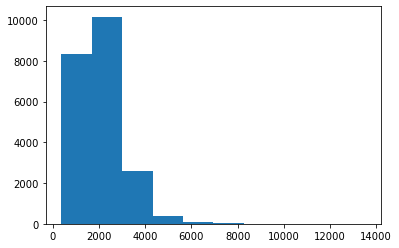

In [67]:
plt.hist(data['sqft_living'])

(array([1.9052e+04, 2.1180e+03, 2.9800e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  78000.,  840200., 1602400., 2364600., 3126800., 3889000.,
        4651200., 5413400., 6175600., 6937800., 7700000.]),
 <BarContainer object of 10 artists>)

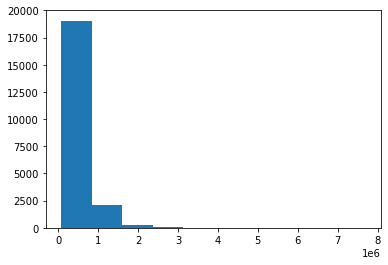

In [68]:
plt.hist(data['price'])

## Models

First, we will look at a Dummy Model. 

In [69]:
dummy_regr = DummyRegressor(strategy="mean")

In [70]:
dummy_regr.fit(X, y)

DummyRegressor()

In [71]:
dummy_regr.predict(X)

array([540309.45999259, 540309.45999259, 540309.45999259, ...,
       540309.45999259, 540309.45999259, 540309.45999259])

In [72]:
dummy_regr.score(X, y)

0.0

Starting with our simple model, we will look at the model utilizing sqft_living as our independent variable based on it having the highest correlation with price.

In [73]:
y = y_train
X = X_train['sqft_living']

lr = sm.OLS(endog=y, exog=sm.add_constant(X))

In [74]:
simple_model_summary = lr.fit().summary()

In [75]:
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 1.707e+04
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:00:00   Log-Likelihood:            -2.3995e+05
No. Observations:               17276   AIC:                         4.799e+05
Df Residuals:                   17274   BIC:                         4.799e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.513e+04   4893.060     -9.224      0.000   -5.47e+04   -3.55e+04
sqft_living   281.0994      2.151    130.665      0.000     276.883     285.316
==============================================================================
Omnibus:                    12320.858   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           539419.118
Skew:                           2.931   Prob(JB):                         0.00
Kurtosis:                      29.739   Cond. No.                     5.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For our simple summary, we see an R-squared of .493. Our p-value is <.05, showing that our results are statistically repeatable. 

Checking for linear relationship.

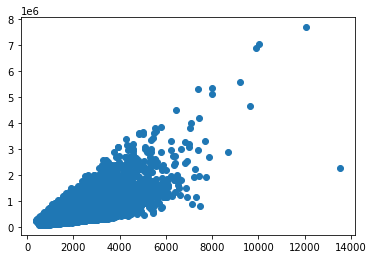

In [76]:
plt.scatter(X,y)

Checking for normality.

In [77]:
lr = LinearRegression()

lr.fit(X_train, y_train)

train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)

In [78]:
train_residuals = y_train - train_preds
test_residuals = y_test - test_preds

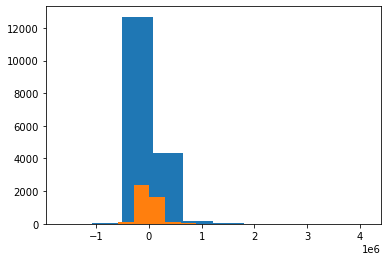

In [79]:
plt.hist(train_residuals, label='Train')
plt.hist(test_residuals, label='Test')

plt.show()

Checking for heteroskedasticity.

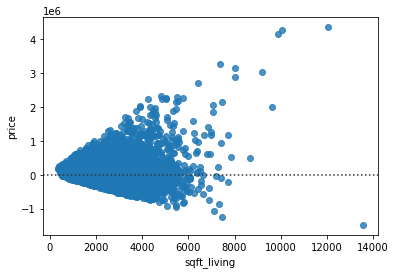

In [80]:
sns.residplot(x=X_train['sqft_living'], y=y_train)
plt.show()        

This model takes all of our variables into consideration.

In [81]:
Xall = X_train
y = y_train

modelall_corr = sm.OLS(y, sm.add_constant(Xall)).fit()
modelall_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1620.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:00:00   Log-Likelihood:            -2.3432e+05
No. Observations:               17276   AIC:                         4.687e+05
Df Residuals:                   17245   BIC:                         4.689e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.739e+06   1.44e+05     18.959      0.000    2.46e+06    3.02e+06
bedrooms              -2.166e+04   2112.632    -10.251      0.000   -2.58e+04   -1.75e+04
bathrooms              3.949e+04   3434.773     11.496      0.000    3.28e+04    4.62e+04
sqft_living              96.7005     18.934      5.107      0.000      59.588     133.813
sqft_lot                  0.2484      0.048      5.167      0.000       0.154       0.343
floors                -7481.2301   3845.387     -1.946      0.052    -1.5e+04      56.118
sqft_above               59.5646     18.939      3.145      0.002      22.442      96.687
sqft_basement            20.0857     18.738      1.072      0.284     -16.643      56.814
yr_built              -1250.3614     75.000    -16.671      0.000   -1397.370   -1103.353
sqft_living15            47.5454      3.557     13.365      0.000      40.572      54.518
sqft_lot15               -0.0350      0.077     -0.453      0.651      -0.186       0.116
distance_from_Seattle -1.598e+04    269.940    -59.200      0.000   -1.65e+04   -1.55e+04
view_EXCELLENT          1.88e+05   1.63e+04     11.525      0.000    1.56e+05     2.2e+05
view_FAIR              3.513e+04   1.37e+04      2.565      0.010    8286.733     6.2e+04
view_GOOD              6.963e+04   1.17e+04      5.939      0.000    4.67e+04    9.26e+04
view_NONE             -4.354e+04   7223.635     -6.027      0.000   -5.77e+04   -2.94e+04
waterfront_UNKNOWN    -1833.8282   4584.738     -0.400      0.689   -1.08e+04    7152.724
waterfront_YES         5.104e+05    2.1e+04     24.252      0.000    4.69e+05    5.52e+05
condition_Poor        -9.313e+04   3.87e+04     -2.406      0.016   -1.69e+05   -1.72e+04
condition_Fair        -1.894e+04    1.6e+04     -1.182      0.237   -5.03e+04    1.25e+04
condition_Good         3.473e+04   3575.712      9.714      0.000    2.77e+04    4.17e+04
condition_Very Good    6.556e+04   5774.446     11.353      0.000    5.42e+04    7.69e+04
grade_4 Low             -2.2e+04   4.05e+04     -0.544      0.587   -1.01e+05    5.73e+04
grade_5 Fair          -5.471e+04   1.39e+04     -3.930      0.000    -8.2e+04   -2.74e+04
grade_6 Low Average   -5.398e+04   5502.345     -9.810      0.000   -6.48e+04   -4.32e+04
grade_8 Good           5.026e+04   4059.436     12.381      0.000    4.23e+04    5.82e+04
grade_9 Better         1.512e+05   6299.878     24.005      0.000    1.39e+05    1.64e+05
grade_10 Very Good     2.903e+05   9061.928     32.036      0.000    2.73e+05    3.08e+05
grade_11 Excellent     5.074e+05   1.38e+04     36.822      0.000     4.8e+05    5.34e+05
grade_12 Luxury        9.728e+05   2.48e+04     39.245      0.000    9.24e+05    1.02e+06
grade_13 Mansion       2.354e+06   6.22e+04     37.823      0.000    2.23e+06    2.48e+06
=======================

We see utillizing all of our final variables, we see a high R-squared of .738 despite possible multicollinearity issues.

In [82]:
Xall_scaled = X_train_scaled
y = y_train

modelall_corr = sm.OLS(y, sm.add_constant(Xall_scaled)).fit()
modelall_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1620.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:00:00   Log-Likelihood:            -2.3432e+05
No. Observations:               17276   AIC:                         4.687e+05
Df Residuals:                   17245   BIC:                         4.689e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.394e+05   1431.832    376.719      0.000    5.37e+05    5.42e+05
x1         -1.968e+04   1919.393    -10.251      0.000   -2.34e+04   -1.59e+04
x2          3.041e+04   2645.164     11.496      0.000    2.52e+04    3.56e+04
x3           8.91e+04   1.74e+04      5.107      0.000    5.49e+04    1.23e+05
x4          1.066e+04   2062.169      5.167      0.000    6613.706    1.47e+04
x5         -4056.5242   2085.072     -1.946      0.052   -8143.477      30.429
x6           4.94e+04   1.57e+04      3.145      0.002    1.86e+04    8.02e+04
x7          8874.1146   8278.649      1.072      0.284   -7352.878    2.51e+04
x8         -3.665e+04   2198.635    -16.671      0.000    -4.1e+04   -3.23e+04
x9          3.254e+04   2434.621     13.365      0.000    2.78e+04    3.73e+04
x10         -944.1572   2085.016     -0.453      0.651   -5031.000    3142.686
x11        -1.068e+05   1803.498    -59.200      0.000    -1.1e+05   -1.03e+05
x12          2.25e+04   1952.251     11.525      0.000    1.87e+04    2.63e+04
x13         4219.7508   1644.967      2.565      0.010     995.448    7444.054
x14         1.043e+04   1756.784      5.939      0.000    6990.240    1.39e+04
x15        -1.282e+04   2127.162     -6.027      0.000    -1.7e+04   -8651.214
x16         -573.3412   1433.405     -0.400      0.689   -3382.961    2236.279
x17         4.326e+04   1783.831     24.252      0.000    3.98e+04    4.68e+04
x18        -3468.5634   1441.866     -2.406      0.016   -6294.766    -642.360
x19        -1715.6647   1452.054     -1.182      0.237   -4561.839    1130.509
x20         1.529e+04   1573.628      9.714      0.000    1.22e+04    1.84e+04
x21         1.754e+04   1545.103     11.353      0.000    1.45e+04    2.06e+04
x22         -784.5070   1442.712     -0.544      0.587   -3612.370    2043.356
x23        -5822.9658   1481.831     -3.930      0.000   -8727.504   -2918.427
x24        -1.588e+04   1618.539     -9.810      0.000   -1.91e+04   -1.27e+04
x25          2.26e+04   1825.631     12.381      0.000     1.9e+04    2.62e+04
x26         4.919e+04   2049.297     24.005      0.000    4.52e+04    5.32e+04
x27         6.434e+04   2008.441     32.036      0.000    6.04e+04    6.83e+04
x28         6.852e+04   1860.845     36.822      0.000    6.49e+04    7.22e+04
x29         6.438e+04   1640.489     39.245      0.000    6.12e+04    6.76e+04
x30         5.663e+04   1497.185     37.823      0.000    5.37e+04    5.96e+04
==============================================================================
Omnibus:                    11880.569   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           809473.137
Skew:                           2.621   Prob(JB):                         0.00
Kurtosis:                      36.122   Cond. No.                         38.9
==

We will look at our top 10 features based on correlation to see if this increases our R-squared.

In [83]:
#just take the top correlated features with price
top_features = price_corr.index[1:11]

X1 = X_train[top_features]
y = y_train

model1_corr = sm.OLS(y, sm.add_constant(X1)).fit()
model1_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     2385.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:00:00   Log-Likelihood:            -2.3840e+05
No. Observations:               17276   AIC:                         4.768e+05
Df Residuals:                   17265   BIC:                         4.769e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.838e+05   1.08e+04     26.315      0.000    2.63e+05    3.05e+05
sqft_living          202.3873     23.789      8.508      0.000     155.758     249.016
sqft_above            -8.3864     23.695     -0.354      0.723     -54.831      38.058
sqft_living15         34.7306      4.228      8.215      0.000      26.444      43.017
bathrooms           1.481e+04   3665.089      4.040      0.000    7622.613     2.2e+04
view_NONE          -1.822e+05   6608.535    -27.573      0.000   -1.95e+05   -1.69e+05
grade_11 Excellent  4.102e+05    1.5e+04     27.369      0.000    3.81e+05     4.4e+05
grade_10 Very Good  2.077e+05   9286.311     22.363      0.000    1.89e+05    2.26e+05
sqft_basement         31.0288     23.687      1.310      0.190     -15.400      77.458
bedrooms           -3.467e+04   2589.815    -13.387      0.000   -3.97e+04   -2.96e+04
grade_12 Luxury     8.741e+05   2.91e+04     30.031      0.000    8.17e+05    9.31e+05
==============================================================================
Omnibus:                    13192.789   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1032160.930
Skew:                           3.057   Prob(JB):                         0.00
Kurtosis:                      40.370   Cond. No.                     5.89e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Despite only utilizing our top features, our R-squared decreased. We also see this only utilizies some of our dummy variables for grade and view.

Since sqft_above is closely correlated to sqft_living, we will drop sqft_above for the next model. We will drop all variables with a correlation of over .70 with sqft_living, including sqft_above, bathrooms, and sqft_living15. We will also include all grades.

In [84]:
features2 = X_train[['sqft_living', 'sqft_basement', 'bedrooms', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_8 Good', 'grade_9 Better', 'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion']]

X2 = features2
y = y_train

model2_corr = sm.OLS(y, sm.add_constant(X2)).fit()
model2_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     2160.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:00:00   Log-Likelihood:            -2.3797e+05
No. Observations:               17276   AIC:                         4.760e+05
Df Residuals:                   17263   BIC:                         4.761e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.155e+05   7716.017     27.925      0.000       2e+05    2.31e+05
sqft_living           143.2933      4.022     35.625      0.000     135.409     151.177
sqft_basement          92.8535      4.674     19.867      0.000      83.692     102.015
bedrooms            -2.457e+04   2535.513     -9.689      0.000   -2.95e+04   -1.96e+04
grade_4 Low         -7.263e+04   4.98e+04     -1.459      0.144    -1.7e+05    2.49e+04
grade_5 Fair        -5.081e+04   1.69e+04     -3.007      0.003   -8.39e+04   -1.77e+04
grade_6 Low Average -3.066e+04   6535.060     -4.692      0.000   -4.35e+04   -1.79e+04
grade_8 Good         7.025e+04   4636.488     15.151      0.000    6.12e+04    7.93e+04
grade_9 Better       2.111e+05   7122.704     29.632      0.000    1.97e+05    2.25e+05
grade_10 Very Good   4.038e+05   1.05e+04     38.597      0.000    3.83e+05    4.24e+05
grade_11 Excellent   6.895e+05   1.63e+04     42.415      0.000    6.58e+05    7.21e+05
grade_12 Luxury      1.247e+06      3e+04     41.593      0.000    1.19e+06    1.31e+06
grade_13 Mansion     2.661e+06   7.64e+04     34.840      0.000    2.51e+06    2.81e+06
==============================================================================
Omnibus:                    11245.022   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           455895.329
Skew:                           2.569   Prob(JB):                         0.00
Kurtosis:                      27.636   Cond. No.                     9.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

While our R-squared increased from our previous model, it is still not as high as using all of our variables. We will use our model of Xall as our final model. We recognize there may be limitations due to multicollinearity.

In [85]:
Xall = X_train
y = y_train

modelall_corr = sm.OLS(y, sm.add_constant(Xall)).fit()
modelall_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1620.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:00:00   Log-Likelihood:            -2.3432e+05
No. Observations:               17276   AIC:                         4.687e+05
Df Residuals:                   17245   BIC:                         4.689e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.739e+06   1.44e+05     18.959      0.000    2.46e+06    3.02e+06
bedrooms              -2.166e+04   2112.632    -10.251      0.000   -2.58e+04   -1.75e+04
bathrooms              3.949e+04   3434.773     11.496      0.000    3.28e+04    4.62e+04
sqft_living              96.7005     18.934      5.107      0.000      59.588     133.813
sqft_lot                  0.2484      0.048      5.167      0.000       0.154       0.343
floors                -7481.2301   3845.387     -1.946      0.052    -1.5e+04      56.118
sqft_above               59.5646     18.939      3.145      0.002      22.442      96.687
sqft_basement            20.0857     18.738      1.072      0.284     -16.643      56.814
yr_built              -1250.3614     75.000    -16.671      0.000   -1397.370   -1103.353
sqft_living15            47.5454      3.557     13.365      0.000      40.572      54.518
sqft_lot15               -0.0350      0.077     -0.453      0.651      -0.186       0.116
distance_from_Seattle -1.598e+04    269.940    -59.200      0.000   -1.65e+04   -1.55e+04
view_EXCELLENT          1.88e+05   1.63e+04     11.525      0.000    1.56e+05     2.2e+05
view_FAIR              3.513e+04   1.37e+04      2.565      0.010    8286.733     6.2e+04
view_GOOD              6.963e+04   1.17e+04      5.939      0.000    4.67e+04    9.26e+04
view_NONE             -4.354e+04   7223.635     -6.027      0.000   -5.77e+04   -2.94e+04
waterfront_UNKNOWN    -1833.8282   4584.738     -0.400      0.689   -1.08e+04    7152.724
waterfront_YES         5.104e+05    2.1e+04     24.252      0.000    4.69e+05    5.52e+05
condition_Poor        -9.313e+04   3.87e+04     -2.406      0.016   -1.69e+05   -1.72e+04
condition_Fair        -1.894e+04    1.6e+04     -1.182      0.237   -5.03e+04    1.25e+04
condition_Good         3.473e+04   3575.712      9.714      0.000    2.77e+04    4.17e+04
condition_Very Good    6.556e+04   5774.446     11.353      0.000    5.42e+04    7.69e+04
grade_4 Low             -2.2e+04   4.05e+04     -0.544      0.587   -1.01e+05    5.73e+04
grade_5 Fair          -5.471e+04   1.39e+04     -3.930      0.000    -8.2e+04   -2.74e+04
grade_6 Low Average   -5.398e+04   5502.345     -9.810      0.000   -6.48e+04   -4.32e+04
grade_8 Good           5.026e+04   4059.436     12.381      0.000    4.23e+04    5.82e+04
grade_9 Better         1.512e+05   6299.878     24.005      0.000    1.39e+05    1.64e+05
grade_10 Very Good     2.903e+05   9061.928     32.036      0.000    2.73e+05    3.08e+05
grade_11 Excellent     5.074e+05   1.38e+04     36.822      0.000     4.8e+05    5.34e+05
grade_12 Luxury        9.728e+05   2.48e+04     39.245      0.000    9.24e+05    1.02e+06
grade_13 Mansion       2.354e+06   6.22e+04     37.823      0.000    2.23e+06    2.48e+06
=======================

In [86]:
Xall_scaled = X_train_scaled
y = y_train

modelall_corr = sm.OLS(y, sm.add_constant(Xall_scaled)).fit()
modelall_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1620.
Date:                Fri, 24 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:00:01   Log-Likelihood:            -2.3432e+05
No. Observations:               17276   AIC:                         4.687e+05
Df Residuals:                   17245   BIC:                         4.689e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.394e+05   1431.832    376.719      0.000    5.37e+05    5.42e+05
x1         -1.968e+04   1919.393    -10.251      0.000   -2.34e+04   -1.59e+04
x2          3.041e+04   2645.164     11.496      0.000    2.52e+04    3.56e+04
x3           8.91e+04   1.74e+04      5.107      0.000    5.49e+04    1.23e+05
x4          1.066e+04   2062.169      5.167      0.000    6613.706    1.47e+04
x5         -4056.5242   2085.072     -1.946      0.052   -8143.477      30.429
x6           4.94e+04   1.57e+04      3.145      0.002    1.86e+04    8.02e+04
x7          8874.1146   8278.649      1.072      0.284   -7352.878    2.51e+04
x8         -3.665e+04   2198.635    -16.671      0.000    -4.1e+04   -3.23e+04
x9          3.254e+04   2434.621     13.365      0.000    2.78e+04    3.73e+04
x10         -944.1572   2085.016     -0.453      0.651   -5031.000    3142.686
x11        -1.068e+05   1803.498    -59.200      0.000    -1.1e+05   -1.03e+05
x12          2.25e+04   1952.251     11.525      0.000    1.87e+04    2.63e+04
x13         4219.7508   1644.967      2.565      0.010     995.448    7444.054
x14         1.043e+04   1756.784      5.939      0.000    6990.240    1.39e+04
x15        -1.282e+04   2127.162     -6.027      0.000    -1.7e+04   -8651.214
x16         -573.3412   1433.405     -0.400      0.689   -3382.961    2236.279
x17         4.326e+04   1783.831     24.252      0.000    3.98e+04    4.68e+04
x18        -3468.5634   1441.866     -2.406      0.016   -6294.766    -642.360
x19        -1715.6647   1452.054     -1.182      0.237   -4561.839    1130.509
x20         1.529e+04   1573.628      9.714      0.000    1.22e+04    1.84e+04
x21         1.754e+04   1545.103     11.353      0.000    1.45e+04    2.06e+04
x22         -784.5070   1442.712     -0.544      0.587   -3612.370    2043.356
x23        -5822.9658   1481.831     -3.930      0.000   -8727.504   -2918.427
x24        -1.588e+04   1618.539     -9.810      0.000   -1.91e+04   -1.27e+04
x25          2.26e+04   1825.631     12.381      0.000     1.9e+04    2.62e+04
x26         4.919e+04   2049.297     24.005      0.000    4.52e+04    5.32e+04
x27         6.434e+04   2008.441     32.036      0.000    6.04e+04    6.83e+04
x28         6.852e+04   1860.845     36.822      0.000    6.49e+04    7.22e+04
x29         6.438e+04   1640.489     39.245      0.000    6.12e+04    6.76e+04
x30         5.663e+04   1497.185     37.823      0.000    5.37e+04    5.96e+04
==============================================================================
Omnibus:                    11880.569   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           809473.137
Skew:                           2.621   Prob(JB):                         0.00
Kurtosis:                      36.122   Cond. No.                         38.9
==

Checking Root Mean Squared Error

In [87]:
from sklearn.metrics import mean_squared_error

In [88]:
modelall = LinearRegression().fit(Xall, y_train)
predall=modelall.predict(Xall)
trainall_rmse = mean_squared_error(y_train, predall, squared=False)

Xall_test = X_test[Xall.columns]
predall_test = modelall.predict(Xall_test)
testall_rmse = mean_squared_error(y_test, predall_test, squared=False)

In [89]:
print('Model All - Based On Observations:')
print('  Training Data RMSE: ',trainall_rmse)
print('  Test Data RMSE: ',testall_rmse)

Model All - Based On Observations:
  Training Data RMSE:  188028.54677967308
  Test Data RMSE:  190422.77298012038


## Checking Assumptions

In [90]:
lr = LinearRegression()

lr.fit(Xall, y_train)

train_preds = lr.predict(Xall)
test_preds = lr.predict(X_test[Xall.columns])

In [91]:
train_residuals = y_train - train_preds
test_residuals = y_test - test_preds

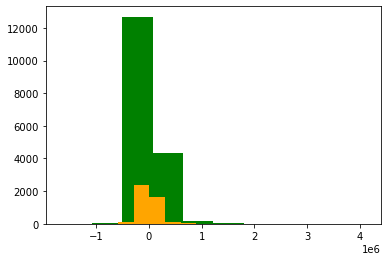

In [92]:
# Histogram of residuals
plt.hist(train_residuals, label='Train', color='g')
plt.hist(test_residuals, label='Test', color='orange')

plt.show()

Our histogram of residuals is relatively normal.

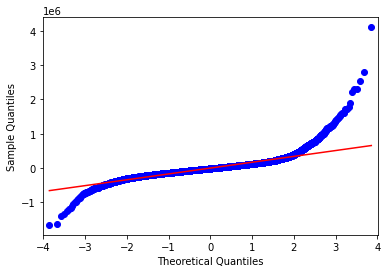

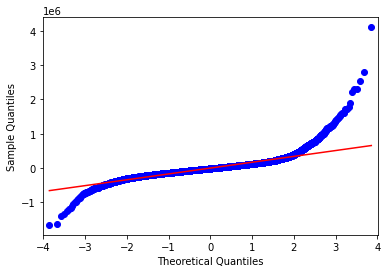

In [93]:
import statsmodels.api as sm

sm.qqplot(train_residuals, line = 'r')


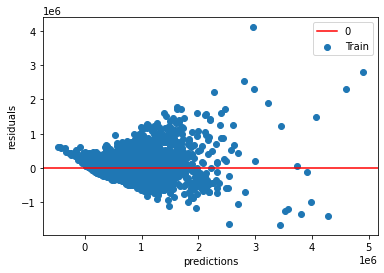

In [94]:
plt.scatter(train_preds, train_residuals, label='Train')

plt.axhline(y=0, color = 'red', label = '0')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.legend()
plt.show()

We do not want to see a patter in our residuals. 

## Creating Visualizations for Presentation

In [95]:
training_data=X_train.join(y_train)

### Visualizing Waterfront

We will create a simple visualization to represent the relationship between Waterfront and price utilizing the mean price for Waterfront properties vs. Non-Waterfront properties.

In [96]:
df_Waterfront = training_data[['price', 'waterfront_YES']]
df_Waterfront

,price,waterfront_YES
17843,295000.0,0
16911,358000.0,0
20876,790000.0,0
14355,480000.0,0
15790,1190000.0,0
...,...,...
1160,435000.0,0
21246,559000.0,0
1175,585000.0,0
2934,685530.0,0


In [97]:
df_Waterfront = df_Waterfront.loc[df_Waterfront['waterfront_YES'] == 1]

In [98]:
df_Waterfront

,price,waterfront_YES
3249,1000000.0,1
4214,1880000.0,1
14808,2600000.0,1
18440,2700000.0,1
18582,570000.0,1
...,...,...
11103,1180000.0,1
2073,1200000.0,1
5661,1600000.0,1
4365,1150000.0,1


In [99]:
df_Waterfront.describe()

,price,waterfront_YES
count,1.250000e+02,125.0
mean,1.640787e+06,1.0
std,1.132852e+06,0.0
min,2.850000e+05,1.0
25%,8.000000e+05,1.0
50%,1.400000e+06,1.0
75%,2.050000e+06,1.0
max,7.060000e+06,1.0


In [100]:
average_waterfront=df_Waterfront.mean()[0]

In [101]:
df_noWaterfront = training_data[['price', 'waterfront_YES']]
df_noWaterfront

,price,waterfront_YES
17843,295000.0,0
16911,358000.0,0
20876,790000.0,0
14355,480000.0,0
15790,1190000.0,0
...,...,...
1160,435000.0,0
21246,559000.0,0
1175,585000.0,0
2934,685530.0,0


In [102]:
df_noWaterfront = df_noWaterfront.loc[df_noWaterfront['waterfront_YES'] == 0]

In [103]:
average_no_waterfront=df_noWaterfront.mean()[0]

In [104]:
import matplotlib.ticker as mtick

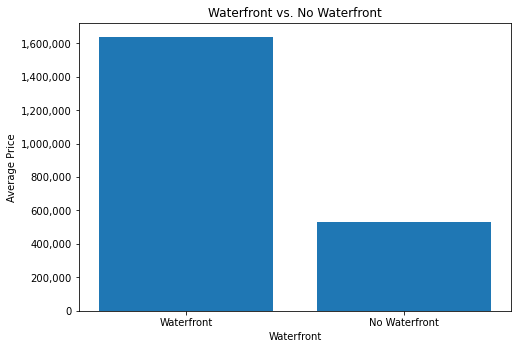

In [105]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Waterfront vs. No Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Average Price')
plt.ticklabel_format(style='plain')
conditions = ['Waterfront', 'No Waterfront']
means = [average_waterfront, average_no_waterfront]
ax.bar(conditions,means)
ax.get_yaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()
#fig.savefig('waterfront.png', bbox_inches='tight', dpi=300);

### Our Model vs. Data Average: Interpretting Coefficients

Based on a coefficient of 510,400 a property with Waterfront increases price on an average of 510,400 dollars compared to propertys with no Waterfront.

### Visualizing Square Foot of Living Space

We will create a simple visualization to represent the relationship between square foot of living space and price utilizing a scatter plot for our data set.

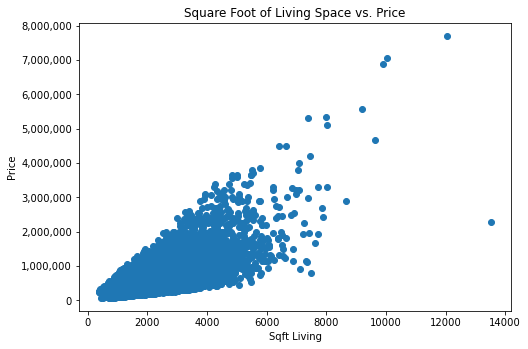

In [106]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.scatter(x=data['sqft_living'], y=data['price'])
plt.title('Square Foot of Living Space vs. Price')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.ticklabel_format(style='plain')
ax.get_yaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
#fig.savefig('sqftliving.png', bbox_inches='tight', dpi=300);

In [107]:
np.std(training_data['sqft_living'])

921.4460502605217

### Our Model vs. Data Average: Interpretting Coefficients

When scaling our model, we found an increase in one standard deviation of Squarefoot of Living Space leads to a price increase of 89,100 dollars. This equates to an increase of living area by 921 square feet leads to a price increase of 89,100, all other variables held equal. This equates to a 96.74 dollar increase per square foot increase.

### Visualizing Conditon

We will create a simple visualization to represent the relationship between condition and price utilizing the mean price for each condition.

In [108]:
df_condition_Poor = training_data[['price', 'condition_Poor']]
df_condition_Poor

,price,condition_Poor
17843,295000.0,0
16911,358000.0,0
20876,790000.0,0
14355,480000.0,0
15790,1190000.0,0
...,...,...
1160,435000.0,0
21246,559000.0,0
1175,585000.0,0
2934,685530.0,0


In [109]:
df_condition_Poor = df_condition_Poor.loc[df_condition_Poor['condition_Poor'] == 1]

In [110]:
df_condition_Poor.mean()

price             352914.583333
condition_Poor         1.000000
dtype: float64

In [111]:
Poor_Mean=df_condition_Poor.mean()[0]

In [112]:
df_condition_Fair = training_data[['price', 'condition_Fair']]
df_condition_Fair

,price,condition_Fair
17843,295000.0,0
16911,358000.0,0
20876,790000.0,0
14355,480000.0,0
15790,1190000.0,0
...,...,...
1160,435000.0,0
21246,559000.0,0
1175,585000.0,0
2934,685530.0,0


In [113]:
df_condition_Fair = df_condition_Fair.loc[df_condition_Fair['condition_Fair'] == 1]

In [114]:
df_condition_Fair.mean()

price             332600.776224
condition_Fair         1.000000
dtype: float64

In [115]:
Fair_Mean=df_condition_Fair.mean()[0]

In [116]:
df_condition_Good = training_data[['price', 'condition_Good']]
df_condition_Good

,price,condition_Good
17843,295000.0,1
16911,358000.0,1
20876,790000.0,0
14355,480000.0,0
15790,1190000.0,0
...,...,...
1160,435000.0,0
21246,559000.0,0
1175,585000.0,1
2934,685530.0,0


In [117]:
df_condition_Good = df_condition_Good.loc[df_condition_Good['condition_Good'] == 1]

In [118]:
df_condition_Good.mean()

price             523475.126487
condition_Good         1.000000
dtype: float64

In [119]:
Good_Mean=df_condition_Good.mean()[0]

In [120]:
df_condition_Very_Good = training_data[['price', 'condition_Very Good']]
df_condition_Very_Good

,price,condition_Very Good
17843,295000.0,0
16911,358000.0,0
20876,790000.0,0
14355,480000.0,1
15790,1190000.0,0
...,...,...
1160,435000.0,0
21246,559000.0,0
1175,585000.0,0
2934,685530.0,0


In [121]:
df_condition_Very_Good = df_condition_Very_Good.loc[df_condition_Very_Good['condition_Very Good'] == 1]

In [122]:
Very_Good_Mean = df_condition_Very_Good.mean()[0]

In [123]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17276 entries, 17843 to 6619
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bedrooms               17276 non-null  int64  
 1   bathrooms              17276 non-null  float64
 2   sqft_living            17276 non-null  int64  
 3   sqft_lot               17276 non-null  int64  
 4   floors                 17276 non-null  float64
 5   sqft_above             17276 non-null  int64  
 6   sqft_basement          17276 non-null  float64
 7   yr_built               17276 non-null  int64  
 8   sqft_living15          17276 non-null  int64  
 9   sqft_lot15             17276 non-null  int64  
 10  distance_from_Seattle  17276 non-null  float64
 11  view_EXCELLENT         17276 non-null  uint8  
 12  view_FAIR              17276 non-null  uint8  
 13  view_GOOD              17276 non-null  uint8  
 14  view_NONE              17276 non-null  uint8  
 15 

In [124]:
Good_Mean

523475.1264874394

In [125]:
Poor_Mean

352914.5833333333

In [126]:
Very_Good_Mean

597665.6950037286

In [127]:
Fair_Mean

332600.7762237762

In [128]:
data['condition'].value_counts()

Average      14020
Good          5677
Very Good     1700
Fair           170
Poor            29
Name: condition, dtype: int64

In [129]:
average_condition_data= data[data['condition'] == 'Average']

In [130]:
average_condition_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,distance_from_Seattle
0,221900.0,3,1.00,1180,5650,1.0,UNKNOWN,NONE,Average,7 Average,1180,0.0,1955,1340,5650,7.644653
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1690,7639,7.872439
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,2720,8062,10.220653
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,1800,7503,13.655673
5,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530.0,2001,4760,101930,15.860512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,1530,1509,6.342232
21593,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,1830,7200,6.802472
21594,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,1020,2007,1.999258
21595,400000.0,3,2.50,1600,2388,2.0,UNKNOWN,NONE,Average,8 Good,1600,0.0,2004,1410,1287,13.511845


In [131]:
average_condition_data.mean()

price                    542173.057347
bedrooms                      3.376748
bathrooms                     2.223680
sqft_living                2149.205492
sqft_lot                  14746.596362
floors                        1.620150
sqft_above                 1906.793153
sqft_basement               238.458417
yr_built                   1979.452211
sqft_living15              2043.880385
sqft_lot15                12498.973823
distance_from_Seattle        11.841735
dtype: float64

In [132]:
Average_Mean = 542173.057347

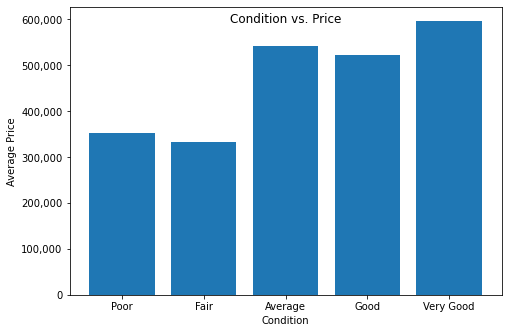

In [133]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.suptitle('Condition vs. Price')
plt.xlabel('Condition')
plt.ylabel('Average Price')
conditions = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
means = [Poor_Mean, Fair_Mean, Average_Mean, Good_Mean, Very_Good_Mean]
ax.bar(conditions,means)
ax.get_yaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()
#fig.savefig('condition.png', bbox_inches='tight', dpi=300)


### Our Model vs. Data Average: Interpretting Coefficients

Our model found that the difference between Average and Fair conditions was not significant. Our model found that Poor condition has a coefficient of -93,130 meaning that on average, a condition of Poor is associated with a 93,130 decrease in price compared to the condition of Average. A condition of Good has a coefficient of 34,730 meaning that on average, a condition of Good is associated with a 34,730 increase in price. A condition of Very Good has a coefficient of 65,560, meaning that on average, a condition of Very Good is associated with a 65,560 increase in price.

## Running Polynomial Feature Test

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(Xall)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=25)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

poly_reg_y_predicted = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse

poly_reg_model.score(X_train, y_train)

0.8564799568569169

## Results

Our final model had an R2 of .738, meaning that 73.8 percent of the variation in price is explained by our regression model. Our final model also had a Mean Squared Error 180028.55 and a Root Mean Squared Error of 433.62. On average, our model is off from the actual price by 433.62 dollars.


### Limitations

Some limitations of our final model include possible issues with multicollinearity in some of our independent variables such as sqft_above, bathrooms, sqft_living15, sqft_lot, and sqft_lot15 which all have a greater than .7 correlation with sqft_living. There are also issues with some independent variables being statistically significant within the model. Independent variables such as waterfront_unknown, sqft_lot, grade_4 Low, sqft_basement, condition_Fair, and floors all display p-values that are greater than alpha value of .05. Another possible limitation of our model is that we kept possible outliers within the dataset which may skew our results.

### Recommendation

We recommend that realtors utilize our complex model instead of using the commonly used comparables method. Our model offers time saving given its ease of use and also gives a more accurate result than other methods. Our model takes in a large number of variables when performing its regression, and is senstive to rapidly evolving market trends. Given our models accuracy and ease of use, we hope to save realtors both dollars and time.

## Next Steps

- Identify big picture housing trends over time, introduce variables such as mortgage rates and fed interest rates to predict buyers/vs sellers market in our pricing
- Find correlations between specific amenities or attributes and time to sale
- Identify more features/create a larger data set that can create a more accurate r-squared, an example could be pulling in nationwide data house sales data especially with elements that are not unique to King County. 
- Create a similar tool for buyers as well that helps them decide what to offer, or what they can likely negotiate down to for a fair price


## Conclusion

Creating listing prices based on our model is a significant improvement:
- The multiple linear regression model shows an overall r-squared of .738, and the polynomial regression has value of .856. This high level of fit represents a substantial increase in prediction quality from the methodology of choosing 2-3 comparables or a simple regression model (.49 r-squared)
- RMSE of 188,028.55 shows that our model will be off an average of 188,028 dollars
- The regression modeling takes into account a much larger number of factors in housing price, and is sensitive to rapidly evolving market variables
- The predictions can be made quickly, and the model saves the Realtor time both in making listing decisions,  and creating the most accurate listing price
- Using our model instead of searching for comps will save time and energy!